In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


In [2]:
# Data directories
train_dir = "C://Users//asus//Downloads//emotion_detection_project//train//"
test_dir = "C://Users//asus//Downloads//emotion_detection_project//test//"

# Data generators with augmentation
img_size = 48
batch_size = 64

In [27]:
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True
# )

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(img_size, img_size),
#     color_mode="grayscale",
#     batch_size=batch_size,
#     class_mode="categorical",
#     shuffle=True
# )


# validation_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(img_size, img_size),
#     color_mode="grayscale",
#     batch_size=batch_size,
#     class_mode="categorical",
#     shuffle=False
# )

# validation_steps = validation_generator.n // validation_generator.batch_size

In [16]:
# Model architecture
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x

def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

In [17]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3, 3))
    conv_2 = Convolution(conv_1, 64, (5, 5))
    conv_3 = Convolution(conv_2, 128, (3, 3))
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)
    output = Dense(7, activation="softmax")(dense_1)
    model = Model(inputs=[inputs], outputs=[output])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

In [28]:
model = model_fer((img_size, img_size, 1))
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [29]:
epochs = 15

checkpoint = ModelCheckpoint("model_2.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint]

history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        color_mode="grayscale",
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=True
    )

    validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        color_mode="grayscale",
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False
    )

    steps_per_epoch = len(train_generator.filenames) // batch_size
    validation_steps = len(validation_generator.filenames) // batch_size
    
    train_history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        verbose=1
    )
    
    # Append training history for this epoch
    history['loss'].extend(train_history.history['loss'])
    history['accuracy'].extend(train_history.history['accuracy'])
    history['val_loss'].extend(train_history.history['val_loss'])
    history['val_accuracy'].extend(train_history.history['val_accuracy'])

    # Save model weights after each epoch
    model.save_weights(f"model_2_epoch_{epoch+1}.weights.h5")

# Save final model weights
model.save_weights("model_2_final.weights.h5")

Epoch 1/15
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
448/448 ━━━━━━━━━━━━━━━━━━━━ 208s 447ms/step - accuracy: 0.2540 - loss: 1.9497 - val_accuracy: 0.3071 - val_loss: 1.8826
Epoch 2/15
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
448/448 ━━━━━━━━━━━━━━━━━━━━ 191s 424ms/step - accuracy: 0.3601 - loss: 1.6340 - val_accuracy: 0.3555 - val_loss: 1.8017
Epoch 3/15
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
448/448 ━━━━━━━━━━━━━━━━━━━━ 205s 457ms/step - accuracy: 0.4139 - loss: 1.5074 - val_accuracy: 0.4116 - val_loss: 1.5760
Epoch 4/15
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
448/448 ━━━━━━━━━━━━━━━━━━━━ 204s 455ms/step - accuracy: 0.4521 - loss: 1.4137 - val_accuracy: 0.5100 - val_loss: 1.2922
Epoch 5/15
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
448/448 ━━━━━━━━━━━━━━━━━━━━ 195s 43

In [30]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.5187 - loss: 1.2006


[1.0757561922073364, 0.5866536498069763]

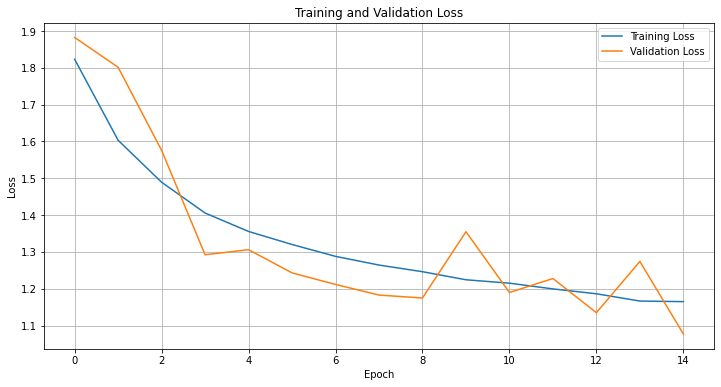

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

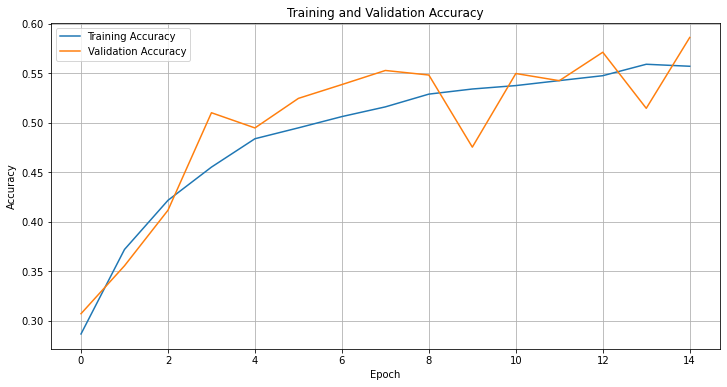

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
model_json = model.to_json()
with open('model_b.json', 'w') as json_file:
    json_file.write(model_json)